## Week 2 Lesson

**Learning objectives**   
1. Be able to use google forms to create a survey  
2. Be able to write a short python code to read the survey results and present in a table format  
3. Be able to write a python code to analyze the table results displaying statistics on each numerical question (mean, median, std, 95% conf interval, t-test comparing column results)  
4. Be able to write a python code to visually represent the data as a barchart, pie chart, scatter plot with error bars, etc.    

### Below are some simple steps in creating your own poll using Google forms

Open a Google form from your browser:

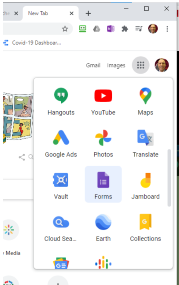

Let's take a look at the data collected from the short survey I sent out to you all.  docs.google.com/forms

From the menu in your form select download responses: 

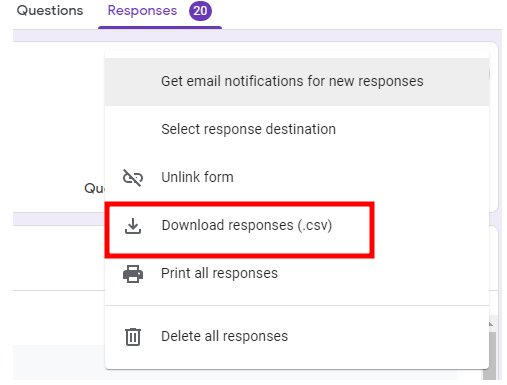

**Then we need to extract the zip file that was downloaded:**

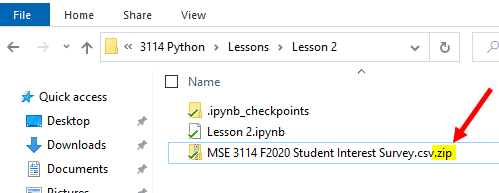

**Extracting the zip file creates the folder "MSE 3114 F2020 Student Interest Survey.csv"  Yes this is a folder.  **

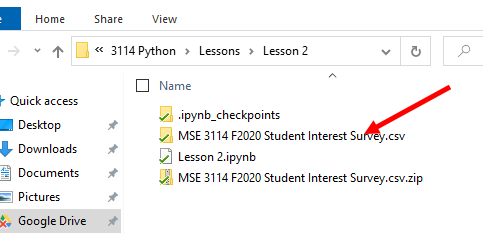

**rename folder to "data"** - I just don't like the long name

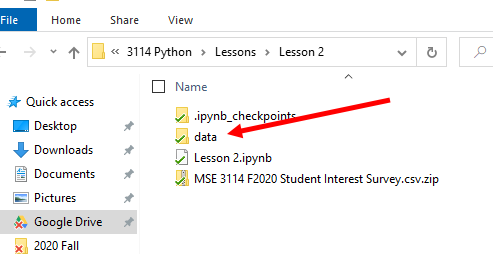

#### Now we are ready to import and analyze the data

In [1]:
import os  #we use this to join our file path to our filename
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
## you can include the filename in the path and just read path but I wanted to show you how to join a path to a filename if they were separate
## for example you might want to do this if you were importing multiple files and you had a list of filenames
path = r'C:\Users\sgc\Google Drive\Teaching\2114 & 3114 Math I & II\3114 Python\Lessons\Lesson 2\data'
filename='MSE 3114 F2020 Student Interest Survey.csv'
fullpath=os.path.join(path,filename)

raw=pd.read_csv(fullpath).drop(columns='Username') #dropping username to make poll anonymous
raw.head()  #shows first 5 rows

,Timestamp,"Digitizing data from the literature / reanalyzing / fitting / plotting. This helps you to be able to use data from the literature to directly compare with your own data (for example, from senior design research).",Statistical Data Visualization. Taking multiple recorded data sets and re-plotting with 95% shaded confidence intervals.,"Representing anisotropy through 3D surface plots, contour plots, 2D projections and other 3D representations.",Generate crystal structures in python and slice by plane indices. Allow for more than 1 atom type.,Finite difference simulations for transport problems in 1D & 2D plotting with contour plots / surface plots / heat maps and output a movie of the results.,"Statistics of data set with multiple variables, linear regression over multiple variables.",Grain size determination through automated python image analysis.,Matminer. Creating plots of materials properties and color coded by a third property.,Other,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,2020/08/10 3:27:53 PM AST,NaN,1,3,0,4,1,2,2,none,2.0,0.0,0.0,0.0,0.0,1.0,1.0
1,2020/09/01 4:18:57 PM AST,4.0,2,4,4,4,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020/09/01 4:26:16 PM AST,4.0,3,3,4,2,4,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020/09/01 4:29:22 PM AST,3.0,2,3,2,3,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020/09/01 4:30:05 PM AST,3.0,0,4,4,4,1,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#drop the timestamp column. This isn't useful. 
data=raw.drop(columns='Timestamp')
data.head()

,"Digitizing data from the literature / reanalyzing / fitting / plotting. This helps you to be able to use data from the literature to directly compare with your own data (for example, from senior design research).",Statistical Data Visualization. Taking multiple recorded data sets and re-plotting with 95% shaded confidence intervals.,"Representing anisotropy through 3D surface plots, contour plots, 2D projections and other 3D representations.",Generate crystal structures in python and slice by plane indices. Allow for more than 1 atom type.,Finite difference simulations for transport problems in 1D & 2D plotting with contour plots / surface plots / heat maps and output a movie of the results.,"Statistics of data set with multiple variables, linear regression over multiple variables.",Grain size determination through automated python image analysis.,Matminer. Creating plots of materials properties and color coded by a third property.,Other,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,1,3,0,4,1,2,2,none,2.0,0.0,0.0,0.0,0.0,1.0,1.0
1,4.0,2,4,4,4,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,3,3,4,2,4,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,2,3,2,3,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,0,4,4,4,1,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Notice we have a bunch of columns tacked on the end of our poll data we need to get rid of.  Rather than dropping them all let's just keep the first 8 columns.

In [4]:
data=data.iloc[:,0:8] #take columns 0 through but not including 8
data.head()

,"Digitizing data from the literature / reanalyzing / fitting / plotting. This helps you to be able to use data from the literature to directly compare with your own data (for example, from senior design research).",Statistical Data Visualization. Taking multiple recorded data sets and re-plotting with 95% shaded confidence intervals.,"Representing anisotropy through 3D surface plots, contour plots, 2D projections and other 3D representations.",Generate crystal structures in python and slice by plane indices. Allow for more than 1 atom type.,Finite difference simulations for transport problems in 1D & 2D plotting with contour plots / surface plots / heat maps and output a movie of the results.,"Statistics of data set with multiple variables, linear regression over multiple variables.",Grain size determination through automated python image analysis.,Matminer. Creating plots of materials properties and color coded by a third property.
0,NaN,1,3,0,4,1,2,2
1,4.0,2,4,4,4,2,2,3
2,4.0,3,3,4,2,4,4,3
3,3.0,2,3,2,3,2,2,2
4,3.0,0,4,4,4,1,4,4


In [5]:
#let's shorten our column names
#the column labels are given by data.columns  We can also use data.columns to rename them:
data.columns=['Digitize','Stat Vis','anisotropy','crystal struc','finite diff','regression','grain size','matminer']
data.head()

,Digitize,Stat Vis,anisotropy,crystal struc,finite diff,regression,grain size,matminer
0,NaN,1,3,0,4,1,2,2
1,4.0,2,4,4,4,2,2,3
2,4.0,3,3,4,2,4,4,3
3,3.0,2,3,2,3,2,2,2
4,3.0,0,4,4,4,1,4,4


Let's first t our overall data frame now: 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Digitize       19 non-null     float64
 1   Stat Vis       20 non-null     int64  
 2   anisotropy     20 non-null     int64  
 3   crystal struc  20 non-null     int64  
 4   finite diff    20 non-null     int64  
 5   regression     20 non-null     int64  
 6   grain size     20 non-null     int64  
 7   matminer       20 non-null     int64  
dtypes: float64(1), int64(7)
memory usage: 1.4 KB


so we see that there are 20 entries (rows) and that the column Digitize has a 1 null value since only 19 non-null entries exist.  In this case, I'm going to just delete the row since this was my entry when I was just testing the form. 

In [7]:
data=data.drop(0) #drop row 0 (the first row)
data.head(n=3)

,Digitize,Stat Vis,anisotropy,crystal struc,finite diff,regression,grain size,matminer
1,4.0,2,4,4,4,2,2,3
2,4.0,3,3,4,2,4,4,3
3,3.0,2,3,2,3,2,2,2


Now let's get some statistical data.  Pandas allows us to do this simply by using the describe() function: 

In [8]:
data.describe()
#the 50% percentile is equal to the median

,Digitize,Stat Vis,anisotropy,crystal struc,finite diff,regression,grain size,matminer
count,19.000000,19.000000,19.0,19.000000,19.000000,19.000000,19.000000,19.000000
mean,3.210526,2.631579,3.0,3.105263,2.789474,2.578947,2.736842,3.263158
std,0.713283,1.164785,1.0,1.100239,1.084176,1.121298,1.045738,0.653376
min,2.000000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,2.000000
25%,3.000000,2.000000,2.5,2.500000,2.000000,2.000000,2.000000,3.000000
50%,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,3.500000,4.0,4.000000,3.500000,3.500000,3.500000,4.000000
max,4.000000,4.000000,4.0,4.000000,4.000000,4.000000,4.000000,4.000000


In [9]:
data.describe().iloc[1] #we could grab the mean data from above

Digitize         3.210526
Stat Vis         2.631579
anisotropy       3.000000
crystal struc    3.105263
finite diff      2.789474
regression       2.578947
grain size       2.736842
matminer         3.263158
Name: mean, dtype: float64

In [10]:
data.mean() #or we could use of mean() function

Digitize         3.210526
Stat Vis         2.631579
anisotropy       3.000000
crystal struc    3.105263
finite diff      2.789474
regression       2.578947
grain size       2.736842
matminer         3.263158
dtype: float64

Let's change the order of our columns so that they correspond with the order of the mean values.  

In [11]:
data.mean().sort_values(ascending=False) #this provides a sorted list of mean values

matminer         3.263158
Digitize         3.210526
crystal struc    3.105263
anisotropy       3.000000
finite diff      2.789474
grain size       2.736842
Stat Vis         2.631579
regression       2.578947
dtype: float64

The above hasn't changed our data in any way.  It just gave us a list of sorted column names along with their mean.  Now we could take this sorted list of header names and reindex our data columns.

In [12]:
header_names_sorted=data.mean().sort_values(ascending=False).index
data=data.reindex(header_names_sorted, axis=1) #axis=1 means reindex columns, rows are axis=0
data.head()

,matminer,Digitize,crystal struc,anisotropy,finite diff,grain size,Stat Vis,regression
1,3,4.0,4,4,4,2,2,2
2,3,4.0,4,3,2,4,3,4
3,2,3.0,2,3,3,2,2,2
4,4,3.0,4,4,4,4,0,1
5,4,4.0,3,4,3,4,4,4


Let's try seeing what a histogram of our data looks like.  

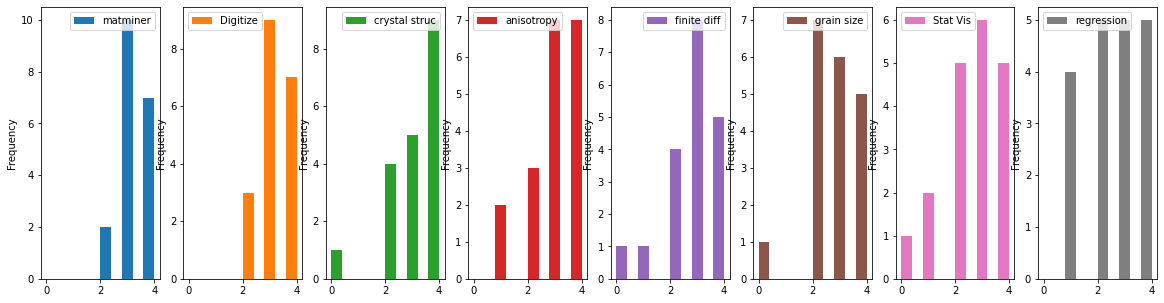

In [13]:
ax=data.plot.hist(subplots=True, legend=True, layout=(1, 8), figsize=(20,5))  #pandas plotting

I think maybe this will look better stacked and notice the plots are sorted by mean value since we changed the order of our columns previously.  

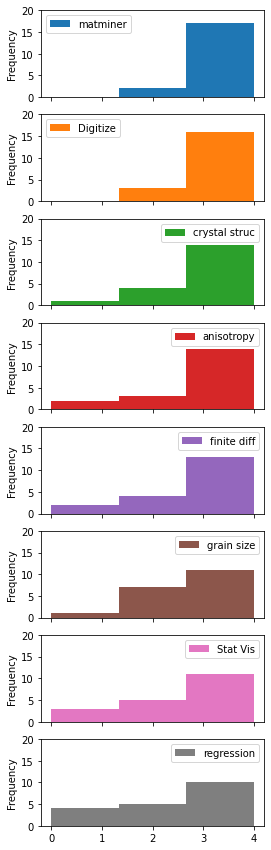

In [14]:
ax=data.plot.hist(subplots=True, legend=True, layout=(8, 1), figsize=(4,15), bins=3, ylim=[0,20])  #pandas plotting

We could also make a horizontal bar chart of our mean values: 

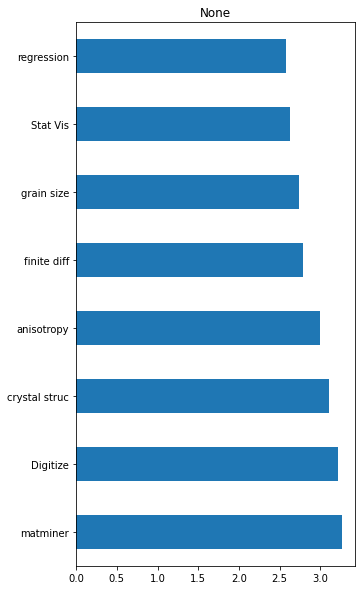

In [15]:
data_mean=data.mean()
ax=data_mean.plot(subplots=True,kind='barh',figsize=(5,10), stacked=True)

Another type of plot that can be useful is the box plot.  Here is the meaning of the box plot: 
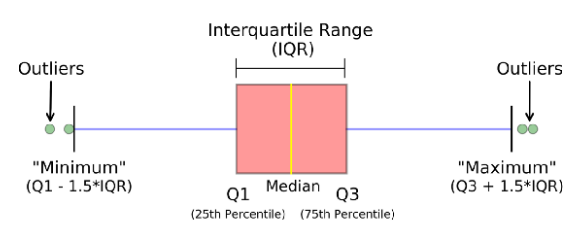

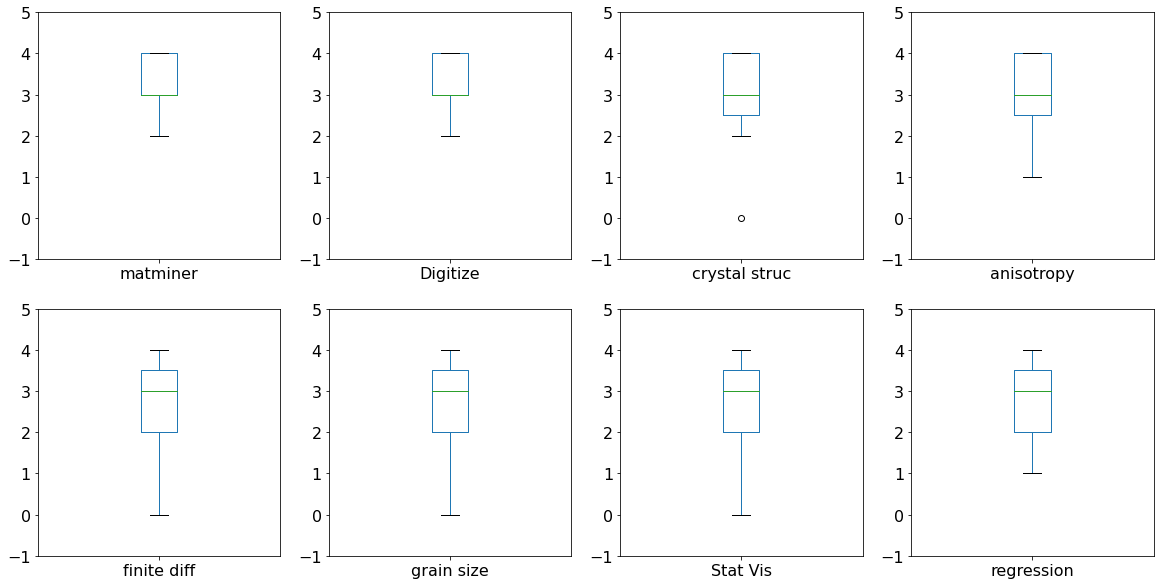

In [16]:
ax=data.plot(subplots=True,kind='box',figsize=(20,10), ylim=(-1,5), layout=(2,4), fontsize=16)

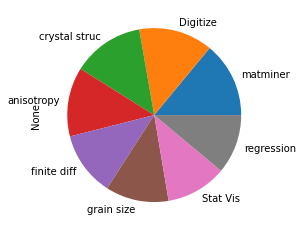

In [17]:
ax=data_mean.plot(kind='pie')

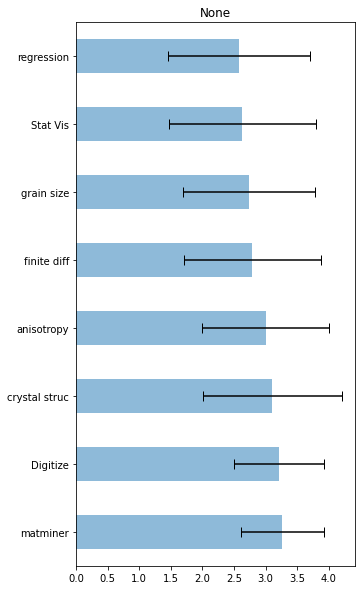

In [18]:
ax=data_mean.plot(alpha=0.5,subplots=True,kind='barh',figsize=(5,10), stacked=True, xerr=data.std(), capsize=5)

Let's use a paired t-test to see if the mean values for our data are significantly different from one another. We will use the standard p-value of <= 0.05 to conclude that the means are significantly different. 

In [38]:
t,p=stats.ttest_rel(data.loc[:,'matminer'], data.loc[:,'regression'])
print(t)
print(p)

2.691255681435181
0.014926180307421034


Since our p value above is less than 0.05, we conclude that the mean of matminer is statistically different than the mean of regression.  Now lets compare the mean of matminer to the mean of all other columns.  

In [55]:
num_col=len(data.columns)
for i in np.arange(num_col):
    t,p=stats.ttest_rel(data.iloc[:,0], data.iloc[:,i])
    if p<0.05:
        print(f'The mean of {data.columns[0]} IS statistically different from the mean of {data.columns[i]}:')
    else:
        print(f'The mean of {data.columns[0]} is NOT statistically different from the mean of {data.columns[i]}:')
    print(f't value is {t:.2f} and p value is {p:.3f}')
    print()

The mean of matminer is NOT statistically different from the mean of matminer:
t value is nan and p value is nan

The mean of matminer is NOT statistically different from the mean of Digitize:
t value is 0.27 and p value is 0.790

The mean of matminer is NOT statistically different from the mean of crystal struc:
t value is 0.53 and p value is 0.604

The mean of matminer is NOT statistically different from the mean of anisotropy:
t value is 1.00 and p value is 0.331

The mean of matminer is NOT statistically different from the mean of finite diff:
t value is 1.69 and p value is 0.107

The mean of matminer IS statistically different from the mean of grain size:
t value is 2.14 and p value is 0.047

The mean of matminer is NOT statistically different from the mean of Stat Vis:
t value is 1.88 and p value is 0.076

The mean of matminer IS statistically different from the mean of regression:
t value is 2.69 and p value is 0.015



We can see here that the mean of matminer is only statistically different from two of our columns, that is 'grain size' and 'regression'.  **Interestingly, even though "Stat Vis" has a mean between these two, "Stat Vis" is not statistically different from 'matminer'**.  

Here are some khan videos on the t-test if you are interested but you will get more of this in Design of Experiments.  

https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/alternative-hypothesis-for-2-sample-t-test

https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/example-of-hypotheses-for-paired-and-2-sample-t-tests

https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/e/hypotheses-two-sample-t-test-means

https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means

